# Credit Risk Analysis

- Nama : Rahmat Fajri
- Email : rfajri912@gmail.com
- [Portofoli](https://rfajri27.github.io/MyPortfolio/)

Project ini menggunakan data *risk rating* berdasarkan data historis lamanya proses pengembalian pinjaman. Pada project ini akan dilakukan analisis terhadpa data dan membuat *decision making model* terhadap pengajuan pinjaman baru.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
sns.set(style='darkgrid')

## Load Data

In [3]:
df = pd.read_excel('data/credit_scoring.xlsx')

df.head()

,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,AGR-000001,295,YA,48,5,61 - 90 days,4
1,AGR-000011,271,YA,36,5,61 - 90 days,4
2,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,AGR-000043,210,YA,12,3,46 - 60 days,3
4,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [4]:
df.describe()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
count,900.000000,900.000000,900.000000,900.000000
mean,163.318889,29.933333,2.932222,2.681111
std,51.863210,13.671988,2.007457,1.294928
min,70.000000,12.000000,0.000000,1.000000
25%,121.000000,12.000000,1.000000,1.000000
50%,162.000000,24.000000,3.000000,3.000000
75%,199.000000,48.000000,5.000000,3.000000
max,300.000000,48.000000,6.000000,5.000000


In [5]:
df.nunique()

kode_kontrak               900
pendapatan_setahun_juta    203
kpr_aktif                    2
durasi_pinjaman_bulan        4
jumlah_tanggungan            7
rata_rata_overdue            5
risk_rating                  5
dtype: int64

Pada data tersebut tidak terdapat *missing values*

## Find Outlier

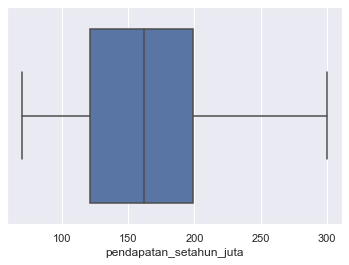

In [6]:
plt.figure()
sns.boxplot(x=df['pendapatan_setahun_juta'])
plt.show()

Berdasarkan plot tersebut dapat disimpulkan bahwa tidak terdapat outlier pada data `pendapatan_setahun_juta`.

## Exploratory Data Analysis

### Persentase Risk Rating

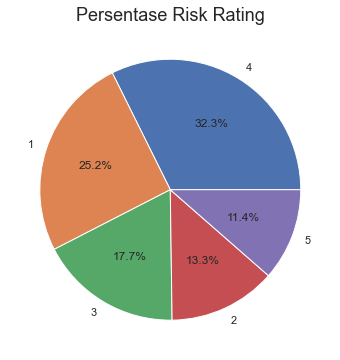

In [7]:
count = df['risk_rating'].value_counts()
labels = df['risk_rating'].unique()
plt.figure(figsize=(6,6))
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title('Persentase Risk Rating', loc='center', fontsize=18)
plt.savefig('images/risk_rating_percentege.png')
plt.show()

Berdasarkan plot tersebut diketahui bahwa dari keseluruhan pengajuan pinjaman terdapat 43.7% yang memiliki resiko tinggi (rating 4 dan 5)

### Box Plot Pendapatan Berdasarkan Risk Rating

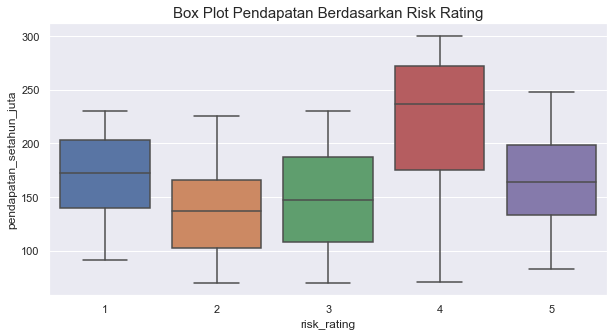

In [8]:
plt.figure(figsize=(10,5))  
ax = sns.boxplot(x = 'risk_rating',y = 'pendapatan_setahun_juta', data = df)  
plt.title ('Box Plot Pendapatan Berdasarkan Risk Rating', fontsize=15)
plt.savefig('images/box_plot_pendapatan.png')
plt.show() 

### Distribusi Risk Rating

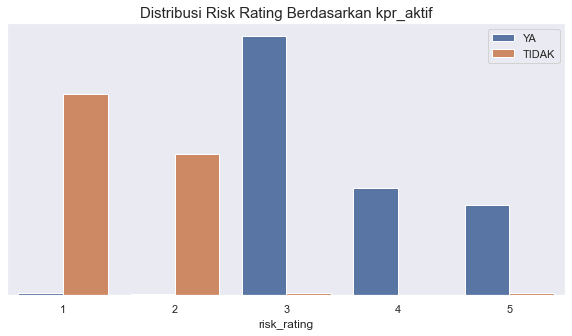

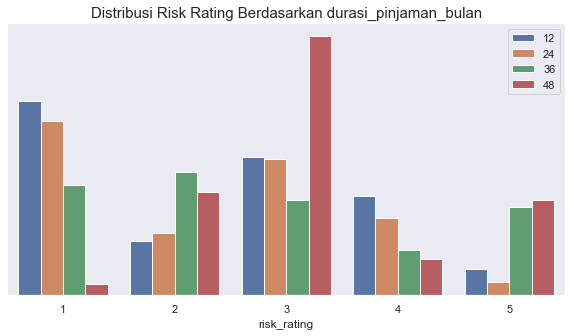

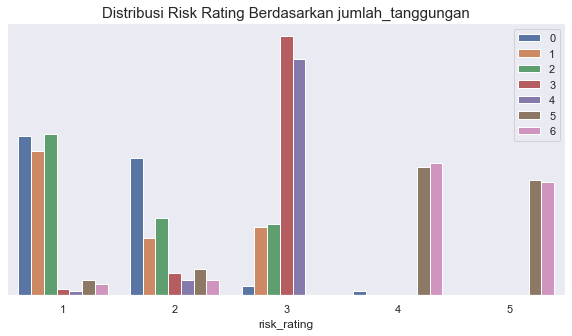

In [9]:
kolom = ['kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan']

for i in kolom:  
    plt.figure(figsize=(10,5))  
    ax = sns.countplot(data = df, x = 'risk_rating', hue = i )  
    plt.title('Distribusi Risk Rating Berdasarkan {}'.format(i), fontsize=15)  
    ax.legend(loc="best")  
    ax.axes.yaxis.set_visible(False)
    plt.savefig('images/plot_dis_{}.png'.format(i))
    plt.show()  

- Jika durasi pinjaman lebih dari 24 bulan, kecenderungan resikonya tinggi
- Jika jumlah tanggungan lebih dari 4, kecenderungan resikonya sangat tinggi (rating 4 dan 5)
- Jika peminjam memiliki KPR aktif, kecenderungan resikonya tinggi

## Data Preprocessing

### Menghilangkan Unnecessary Columns

In [10]:
df_model = df.drop(['kode_kontrak'], axis=1)

In [11]:
df_model.head()

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,295,YA,48,5,61 - 90 days,4
1,271,YA,36,5,61 - 90 days,4
2,159,TIDAK,12,0,0 - 30 days,1
3,210,YA,12,3,46 - 60 days,3
4,165,TIDAK,36,0,31 - 45 days,2


### Melakukan Decimal Scaling

In [12]:
df_model['pendapatan_setahun_juta'] /= 100
df_model.head()

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,2.95,YA,48,5,61 - 90 days,4
1,2.71,YA,36,5,61 - 90 days,4
2,1.59,TIDAK,12,0,0 - 30 days,1
3,2.10,YA,12,3,46 - 60 days,3
4,1.65,TIDAK,36,0,31 - 45 days,2


### Melakukan Encoding pada Data Kategorik

In [13]:
# Selain jumlah_tanggungna
kolom_kategorik = ['kpr_aktif', 'durasi_pinjaman_bulan', 'rata_rata_overdue']

for kol in kolom_kategorik:
    df_model[kol] = LabelEncoder().fit_transform(df_model[kol])

df_model.head()

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,2.95,1,3,5,3,4
1,2.71,1,2,5,3,4
2,1.59,0,0,0,0,1
3,2.10,1,0,3,2,3
4,1.65,0,2,0,1,2


### Split Dataset
Dataset akan dibagi menjadi 90% training & 10% testing

In [14]:
x = df_model.drop('risk_rating', axis=1)
y = df_model['risk_rating']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (810, 5)
Shape of y_train: (810,)
Shape of X_test: (90, 5)
Shape of y_test: (90,)


## Modelling using Decision Tree

In [16]:
model = DecisionTreeClassifier()

model = model.fit(x_train, y_train)

### Model Performance

In [17]:
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [18]:
print('Classification Report (Data Training) :')
acc = round(accuracy_score(y_pred_train, y_train), 3)

print('Accuracy: ', acc)

Classification Report (Data Training) :
Accuracy:  1.0


In [19]:
print('Classification Report (Data Testing):')
acc = round(accuracy_score(y_pred, y_test), 3)


print('Accuracy: ', acc)

Classification Report (Data Testing):
Accuracy:  1.0


## Conclusion

- Dari keseluruhan pengajuan pinjaman terdapat 43.7% yang memiliki resiko tinggi (rating 4 dan 5)
- Kredit risk cenderung tinggi untuk kategori berikut:
    - Memiliki KPR aktif
    - Memiliki jumlah tanggungan lebih dari 4
    - Durasi pinjaman lebih dari 24 bulan
- Dengan menggunakan model *Decision Tree* kita dapat membuat model untuk memprediksi nilai *risk rating* dengan akurasi yang sangat tinggi, sehingga model ini dapat dijadikan sebagai basis pengambilan keputusan terhadap aplikasi pinjaman baru